---
# **Superstore clients analysis with K-means clustering**
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Problem definition**

The goal of the analysis is to find the clients groups according to the key: in which state clients buy products from which category, and what is the profit. To group data K-means clustering method was used. Principal Component Analysis (PCA) is used to reduce dimensions.

**K-means clustering**

The k-means algorithm, also known as the centroid algorithm, is used to divide the input data into a predetermined number of classes. It is one of the algorithms used in clustering and is part of unsupervised learning in Machine Learning.

**Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is the most popular dimension reduction algorithm. Basically, it is about projecting data to a space with fewer dimensions, to best preserve the structure of the data.
It is mainly used to reduce the variables describing a given phenomenon and to discover possible regularities between the features.

In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# **2. Data to analize: load, clean and prepare**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/store/Sample - Superstore.csv', encoding='ISO-8859-1')

Representing category as a number:

In [4]:
print(list(set(data.loc[:,'Category'])))

['Technology', 'Office Supplies', 'Furniture']


In [5]:
data['Category_ID']=data['Category'].replace('Furniture',1).replace('Office Supplies',2).replace('Technology',3)

In [6]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Category_ID
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,1
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,1
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2


In [7]:
# Analized fields: 'Postal code', 'Category_ID', 'Profit'
store = data.loc[:,['Postal Code','Category_ID', 'Profit']].copy()

In [ ]:
store

In [9]:
# Remove duplicates
store.drop_duplicates(inplace=True)

In [ ]:
store

In [12]:
# Remove NaN:
store.dropna(inplace=True)

In [ ]:
store

In [15]:
# Check if there are only numbers:
store.sum(axis=0)

Postal Code    5.460372e+08
Category_ID    1.954200e+04
Profit         2.851409e+05
dtype: float64

# **3. Clustering (k-means method)**

In [19]:
#Standardizing features:
#The standard score of a sample x is calculated as: z = (x - u) / s
#where u is the mean of the training samples,
#and s is the standard deviation of the training samples.
sc = StandardScaler()
store_sc = sc.fit_transform(store)

How many clusters? Elblow and Silhouette method can give the answers.

In [ ]:
# Elbow based on: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    #DD calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

Text(0, 0.5, 'WSS')

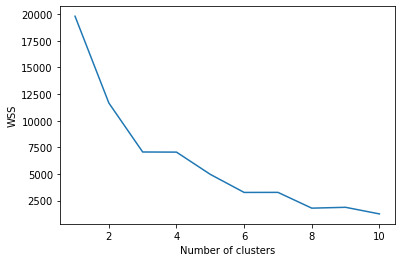

In [ ]:
plt.plot(np.linspace(1, 10, 10), calculate_WSS(store_sc, 10))
plt.xlabel('Number of clusters')
plt.ylabel('WSS')

Number of clusters: 3


In [ ]:
# Silhouette method based on:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
# https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

points= store_sc

# Use silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)
sh_store=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(points)
    centers = clusterer.cluster_centers_

    score = silhouette_score(points, preds)
    sh_store.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.38969008309026415)
For n_clusters = 3, silhouette score is 0.44735172575570364)
For n_clusters = 4, silhouette score is 0.4579500554102699)
For n_clusters = 5, silhouette score is 0.4825660054542104)
For n_clusters = 6, silhouette score is 0.5265915041527808)
For n_clusters = 7, silhouette score is 0.5315607576310748)
For n_clusters = 8, silhouette score is 0.5851606156173441)
For n_clusters = 9, silhouette score is 0.5948306810166429)


Text(0, 0.5, 'Silhouette')

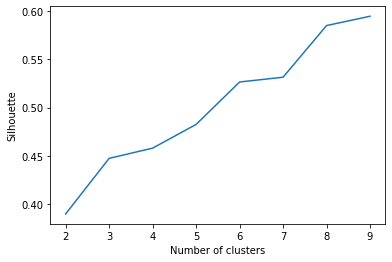

In [ ]:
plt.plot(range(2,10),sh_store)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')

First maximum for 3 clasters.





So for more general, coarse analize, lets choose 3

K-means model:

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=100, random_state=0)
labels = kmeans.fit_predict(store_sc)

In [18]:
labels

array([1, 1, 2, ..., 0, 2, 2], dtype=int32)

# **4. Principal Component Analysis (PCA)**

In [20]:
pca = PCA(n_components=2)
store_pca = pca.fit_transform(store_sc)

In [ ]:
store_pca 

In [ ]:
store_tf = pd.concat([pd.DataFrame(store_pca, columns=['PC1', 'PC2']), pd.DataFrame(labels, columns=['labels'])], axis=1)

In [ ]:
store_tf 

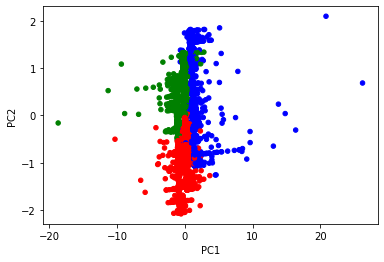

In [ ]:
store_tf.plot.scatter(x='PC1', y='PC2', c=store_tf.labels.replace([0, 1, 2], ['b', 'r', 'g']))
centers = kmeans.cluster_centers_

In [ ]:
centers

array([[ 0.01280522,  1.61251028,  0.32957244],
       [-0.92690673, -0.36227602, -0.03945373],
       [ 0.89009327, -0.37969109, -0.1110355 ]])

**1st cluster: Minnesota, Technology, Profit: 106 coins**

In [ ]:
cl1=centers[0]*store.std(axis=0)+store.mean(axis=0)
cl1

Postal Code    55542.994255
Category_ID        2.990877
Profit           106.336235
dtype: float64

**2nd cluster: Virginia, Office Supplies, Profit: 20 coins**

In [ ]:
cl2=centers[1]*store.std(axis=0)+store.mean(axis=0)
cl2

Postal Code    25455.505242
Category_ID        1.744492
Profit            19.507334
dtype: float64

**3rd cluster: Utah, Office Supplies, Profit: 3 coins**

In [ ]:
cl3=centers[2]*store.std(axis=0)+store.mean(axis=0)
cl3

Postal Code    83631.809087
Category_ID        1.733500
Profit             2.664715
dtype: float64